In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.

- Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

In [4]:
# Chuyển InvoiceDate thành datetime object
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Lấy các cột dữ liệu cần thiết
df_1 = df[["InvoiceNo", "InvoiceDate", "Quantity", "UnitPrice"]]
df_1.head()

,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,536365,2010-12-01 08:26:00,6,2.55
1,536365,2010-12-01 08:26:00,6,3.39
2,536365,2010-12-01 08:26:00,8,2.75
3,536365,2010-12-01 08:26:00,6,3.39
4,536365,2010-12-01 08:26:00,6,3.39


In [11]:
# Tính doanh thu trên mỗi hàng
df_1["Revenue"] = df_1["Quantity"] * df_1["UnitPrice"]
df_1.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_9828/1382900778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Revenue"] = df_1["Quantity"] * df_1["UnitPrice"]


,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Revenue
0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,536365,2010-12-01 08:26:00,6,3.39,20.34
2,536365,2010-12-01 08:26:00,8,2.75,22.00
3,536365,2010-12-01 08:26:00,6,3.39,20.34
4,536365,2010-12-01 08:26:00,6,3.39,20.34


In [12]:
# Chuyển mỗi giá trị InvoiceDate thành index để search theo index
df_1 = df_1.set_index(["InvoiceDate"])
df_1.head()

,InvoiceNo,Quantity,UnitPrice,Revenue
InvoiceDate,,,,
2010-12-01 08:26:00,536365,6,2.55,15.30
2010-12-01 08:26:00,536365,6,3.39,20.34
2010-12-01 08:26:00,536365,8,2.75,22.00
2010-12-01 08:26:00,536365,6,3.39,20.34
2010-12-01 08:26:00,536365,6,3.39,20.34


In [13]:
# Lọc những hàng mà index có chứa năm "2011"
df_2 = df_1["2011"]
df_2 = df_2.reset_index()
df_2.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_9828/2828019697.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2 = df_1["2011"]


,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
0,2011-01-04 10:00:00,539993,10,1.95,19.5
1,2011-01-04 10:00:00,539993,25,0.42,10.5
2,2011-01-04 10:00:00,539993,25,0.42,10.5
3,2011-01-04 10:00:00,539993,5,2.10,10.5
4,2011-01-04 10:00:00,539993,10,1.25,12.5


In [14]:
# Tính tổng doanh thu theo tháng
df_3 = df_2.groupby(by = df_2["InvoiceDate"].dt.month).sum()
df_3.head()

,Quantity,UnitPrice,Revenue
InvoiceDate,,,
1,308966,172752.800,560000.260
2,277989,127448.770,498062.650
3,351872,171486.510,683267.080
4,289098,129164.961,493207.121
5,380391,190685.460,723333.510


In [15]:
# Xóa bỏ các dòng trùng lặp của cùng một đơn hàng
df_4 = df_1.drop_duplicates(subset = "InvoiceNo", keep = "first")
df_4 = df_4["2011"]
df_4 = df_4.reset_index()
df_4.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_9828/220152274.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_4 = df_4["2011"]


,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
0,2011-01-04 10:00:00,539993,10,1.95,19.5
1,2011-01-04 10:09:00,539994,-1,0.00,-0.0
2,2011-01-04 10:12:00,539995,-12,0.00,-0.0
3,2011-01-04 10:12:00,539996,-10,0.00,-0.0
4,2011-01-04 10:15:00,539997,5,0.00,0.0


In [17]:
# Đếm tổng số đơn hàng trong tháng
df_5 = df_4.groupby(by = df_4["InvoiceDate"].dt.month).count()
df_5.head()

,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
InvoiceDate,,,,,
1,1476,1476,1476,1476,1476
2,1393,1393,1393,1393,1393
3,1983,1983,1983,1983,1983
4,1744,1744,1744,1744,1744
5,2162,2162,2162,2162,2162


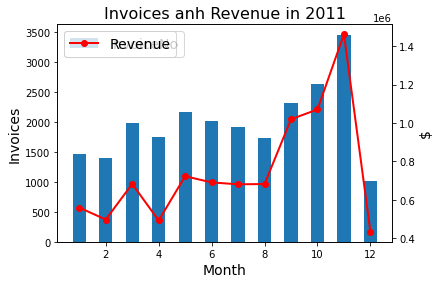

In [20]:
# Vẽ biểu đồ kết hợp
x = df_5.index.get_level_values(0)
plt.bar(x, df_5["InvoiceNo"], width = 0.5, label = "InvoiceNo")
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, df_3["Revenue"], label = "Revenue", linewidth = 2, c = "r", marker = "o")
axes1.set_xlabel("Month", fontsize = 14)
axes1.set_ylabel("Invoices", fontsize = 14)
axes2.set_ylabel("$", fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title("Invoices anh Revenue in 2011", fontsize = 16)
plt.show()

##### Nhận xét
- Tháng 4 có tổng số đơn hàng nhiều hơn tháng 2. Tuy nhiên tổng doanh thu thì chỉ tương đương.
- Tháng 9, 10, 11 tổng số đơn hàng nhiều và tổng doanh thu cũng tăng nhanh chóng.